In [1]:
### Exactitud para el árbol de decisión

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('E:\\datasets\\travel_insurance_us_preprocessed.csv')

target = data['Claim']
features = data.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# < escribe el código aquí >
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)

train_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, train_valid)

print(accuracy_valid)

0.9745756020529017


In [2]:
### Prueba de consistencia
### La proporción de respuestas correctas es del 97%. ¿Es suficiente? Comparemos con la variable objetivo.

class_frequency = target.value_counts(normalize=True)
class_frequency

Claim
0    0.985136
1    0.014864
Name: proportion, dtype: float64

<Axes: xlabel='Claim'>

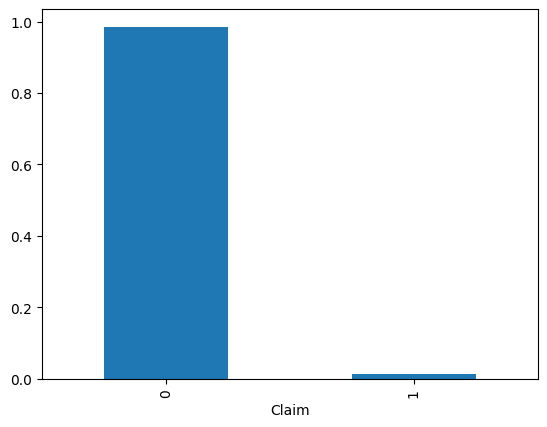

In [3]:
class_frequency.plot(kind='bar')

In [4]:
predicted_valid = pd.Series(model.predict(features_valid))

In [5]:
class_frequency = predicted_valid.value_counts(normalize=True)
class_frequency

0    0.986024
1    0.013976
Name: proportion, dtype: float64

<Axes: >

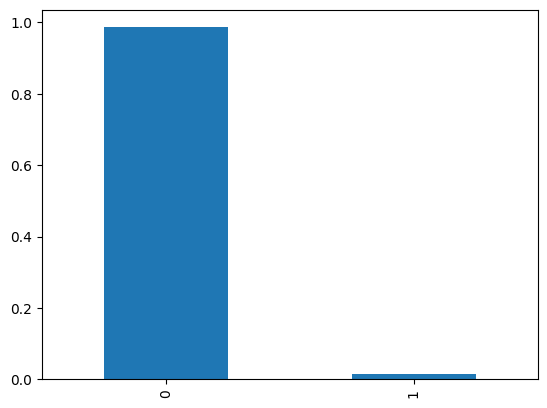

In [6]:
class_frequency.plot(kind='bar')

In [7]:
### Crea un modelo constante: predice la clase "0" para cualquier observación. Guarda sus predicciones en la variable target_pred_constant. 
target_pred_constant = pd.Series(0, index=target.index)

accuracy = accuracy_score(target, target_pred_constant)
accuracy

0.9851362021318595

In [8]:
### "¡Qué gran modelo! ¡Podemos enviarlo a producción!" 
### Esa suele ser la primera reacción, hasta que descubres que no pasa la prueba de cordura
### porque sus predicciones no son mejores que las de un modelo constante que siempre elige la clase más frecuente. 
### Este resultado indica que el modelo no está capturando patrones significativos en los datos, 
### lo cual es crucial para un desempeño fiable. 

In [9]:
''' La exactitud del árbol de decisión es casi la misma que la del modelo constante. ¿Por qué pasa eso y qué debemos hacer al respecto?
Aunque la proporción de predicciones correctas es cercana al 100 %, 
todavía no sabemos si el cliente hará una reclamación al seguro. 
Hay un fuerte desequilibrio de clases en nuestro problema, lo que afecta cómo se entrena el modelo.

Las clases están desequilibradas cuando su proporción está lejos de 1:1. 
El equilibrio de clases se observa si su número es aproximadamente igual.
'''


' La exactitud del árbol de decisión es casi la misma que la del modelo constante. ¿Por qué pasa eso y qué debemos hacer al respecto?\nAunque la proporción de predicciones correctas es cercana al 100 %, \ntodavía no sabemos si el cliente hará una reclamación al seguro. \nHay un fuerte desequilibrio de clases en nuestro problema, lo que afecta cómo se entrena el modelo.\n\nLas clases están desequilibradas cuando su proporción está lejos de 1:1. \nEl equilibrio de clases se observa si su número es aproximadamente igual.\n'

In [10]:
'''La exactitud no evalúa bien el modelo en un escenario de fuerte desequilibrio. ¡Necesitamos una nueva métrica! Pero primero debemos repasar algunas distinciones importantes.

Una clase con la etiqueta "1" se llama positiva y una clase con la etiqueta "0" se llama negativa.

Si combinamos estas respuestas con predicciones, obtendremos la siguiente división:

Respuestas de verdadero positivo (VP) y verdadero negativo (VN)
Respuestas de falso positivo (FP) y falso negativo (FN)
Entonces, las características "positivo" y "negativo" se refieren a una predicción, y "verdadero" y "falso" se refieren a su exactitud.
'''

'La exactitud no evalúa bien el modelo en un escenario de fuerte desequilibrio. ¡Necesitamos una nueva métrica! Pero primero debemos repasar algunas distinciones importantes.\n\nUna clase con la etiqueta "1" se llama positiva y una clase con la etiqueta "0" se llama negativa.\n\nSi combinamos estas respuestas con predicciones, obtendremos la siguiente división:\n\nRespuestas de verdadero positivo (VP) y verdadero negativo (VN)\nRespuestas de falso positivo (FP) y falso negativo (FN)\nEntonces, las características "positivo" y "negativo" se refieren a una predicción, y "verdadero" y "falso" se refieren a su exactitud.\n'

In [11]:
### Respuestas verdaderas positivas

import pandas as pd

target = pd.Series([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1])
predictions = pd.Series([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

verdadera_positiva = ((target == 1) & (predictions == 1)).sum()
print(verdadera_positiva)

5


In [12]:
### Respuestas verdaderas negativas

verdadera_negativa = ((target == 0) & (predictions == 0)).sum()
print(verdadera_negativa)

4


In [13]:
### Respuestas falsas positivas

falso_positivo = ((target == 0) & (predictions == 1)).sum()
print(falso_positivo)

3


In [14]:
### Respuestas falsas negativas

falso_negativo = ((target == 1) & (predictions == 0)).sum()
print(falso_negativo)

2


In [15]:
### Matriz de confusion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target, predictions)
print(cm)

[[4 3]
 [2 5]]


In [16]:
model_cm = confusion_matrix(target_valid, predicted_valid)
print(model_cm)

[[12331   165]
 [  157    12]]


In [17]:
### El modelo es bastante pesimista. A menudo ve respuestas negativas donde no debería.

In [18]:
### Recall
### Recall = VP / (VP + FN)
from sklearn.metrics import recall_score

model_recall = recall_score(target_valid, predicted_valid)
print(model_recall)

0.07100591715976332


In [19]:
### ¡Qué fracaso! El valor de recall no se acerca a 1. ¡Tal vez la métrica de precisión pueda ayudar!

In [20]:
### Precisión
### Precision = VP / (VP + FP)
from sklearn.metrics import precision_score

model_precision = precision_score(target_valid, predicted_valid)
print(model_precision)

0.06779661016949153


In [21]:
### La métrica de precisión tampoco nos dio lo que queríamos. 

In [22]:
### Valor F1
from sklearn.metrics import f1_score

model_f1 = f1_score(target_valid, predicted_valid)
print(model_f1)

0.06936416184971098


In [23]:
### Parece que el valor F1 no pasó la prueba hoy. 